In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from skimage import io
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
classes = ['airplane','automoblie','bird','cat','deer','dog','frog','horse',"ship",'truck']

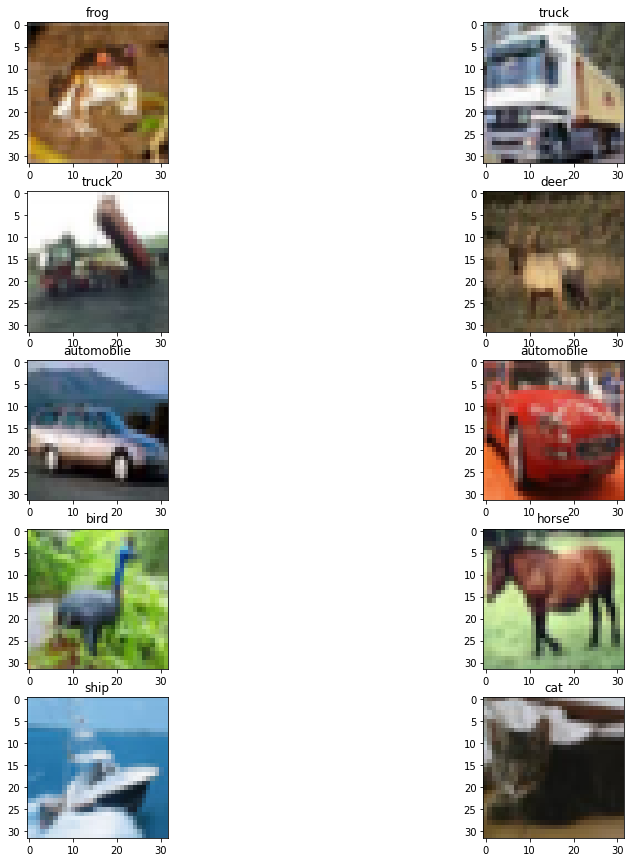

In [ ]:
#@title Visualizing the Dataset
fig = plt.figure(figsize = (15,15))
for i in range(10):
  ax1 = fig.add_subplot(5,2,i+1)
  plt.imshow(x_train[i])
  plt.title(classes[y_train[i,0]])

In [ ]:
#@title Pre-Proccessing
# x_train = x_train.reshape(50000, 32 * 32 * 3)
# x_test = x_test.reshape(10000, 32 * 32 * 3)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# MLP

## Testing Different Batch Sizes

Epoch 1/10
1250/1250 [==============================] - 6s 4ms/step - loss: 1.9716 - accuracy: 0.2815 - val_loss: 1.8093 - val_accuracy: 0.3639
Epoch 2/10
1250/1250 [==============================] - 6s 4ms/step - loss: 1.7868 - accuracy: 0.3585 - val_loss: 1.6971 - val_accuracy: 0.3953
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.7059 - accuracy: 0.3902 - val_loss: 1.6435 - val_accuracy: 0.4194
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6554 - accuracy: 0.4090 - val_loss: 1.6345 - val_accuracy: 0.4195
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6098 - accuracy: 0.4256 - val_loss: 1.5945 - val_accuracy: 0.4310
Epoch 6/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.5783 - accuracy: 0.4358 - val_loss: 1.5818 - val_accuracy: 0.4407
Epoch 7/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5458 - accuracy: 0.4476 - val_loss: 1.5255 - val_accuracy:

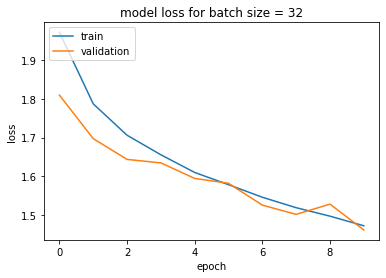

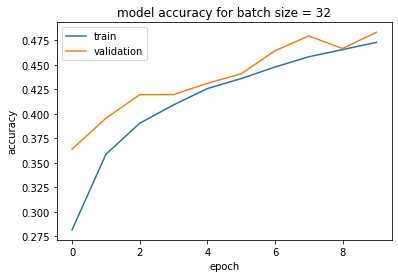

In [ ]:
#@title Batch Size: 32

model = Sequential()
model.add(Flatten())
model.add(Dense(1024, input_shape=(3072, )))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
#model.summary()


history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=10,
                    verbose=1,
                    validation_split=0.2)


loss, acc = model.evaluate(x_test, y_test,verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)


plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss for batch size = 32')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy for batch size = 32')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Epoch 1/10
625/625 [==============================] - 4s 4ms/step - loss: 2.0392 - accuracy: 0.2561 - val_loss: 1.8753 - val_accuracy: 0.3290
Epoch 2/10
625/625 [==============================] - 2s 4ms/step - loss: 1.8452 - accuracy: 0.3378 - val_loss: 1.7671 - val_accuracy: 0.3784
Epoch 3/10
625/625 [==============================] - 2s 4ms/step - loss: 1.7642 - accuracy: 0.3683 - val_loss: 1.7056 - val_accuracy: 0.3994
Epoch 4/10
625/625 [==============================] - 2s 4ms/step - loss: 1.7097 - accuracy: 0.3913 - val_loss: 1.6816 - val_accuracy: 0.4010
Epoch 5/10
625/625 [==============================] - 2s 4ms/step - loss: 1.6683 - accuracy: 0.4046 - val_loss: 1.6337 - val_accuracy: 0.4248
Epoch 6/10
625/625 [==============================] - 2s 4ms/step - loss: 1.6339 - accuracy: 0.4211 - val_loss: 1.5930 - val_accuracy: 0.4391
Epoch 7/10
625/625 [==============================] - 2s 4ms/step - loss: 1.6054 - accuracy: 0.4278 - val_loss: 1.6035 - val_accuracy: 0.4406
Epoch 

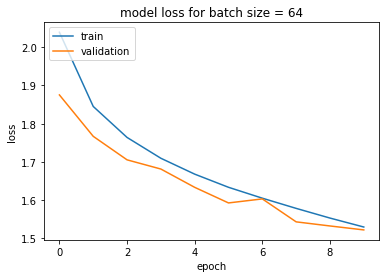

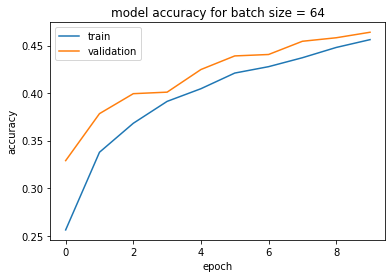

In [ ]:
#@title Batch Size: 64

model = Sequential()
model.add(Flatten())
model.add(Dense(1024, input_shape=(3072, )))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
#model.summary()


history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=10,
                    verbose=1,
                    validation_split=0.2)


loss, acc = model.evaluate(x_test, y_test,verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)


plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss for batch size = 64')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy for batch size = 64')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Epoch 1/10
157/157 [==============================] - 2s 8ms/step - loss: 2.1791 - accuracy: 0.1911 - val_loss: 2.0072 - val_accuracy: 0.2902
Epoch 2/10
157/157 [==============================] - 1s 6ms/step - loss: 2.0079 - accuracy: 0.2675 - val_loss: 1.9212 - val_accuracy: 0.3228
Epoch 3/10
157/157 [==============================] - 1s 5ms/step - loss: 1.9297 - accuracy: 0.3058 - val_loss: 1.8750 - val_accuracy: 0.3290
Epoch 4/10
157/157 [==============================] - 1s 5ms/step - loss: 1.8810 - accuracy: 0.3247 - val_loss: 1.8320 - val_accuracy: 0.3484
Epoch 5/10
157/157 [==============================] - 1s 6ms/step - loss: 1.8430 - accuracy: 0.3435 - val_loss: 1.7896 - val_accuracy: 0.3639
Epoch 6/10
157/157 [==============================] - 1s 5ms/step - loss: 1.8108 - accuracy: 0.3510 - val_loss: 1.7682 - val_accuracy: 0.3796
Epoch 7/10
157/157 [==============================] - 1s 5ms/step - loss: 1.7829 - accuracy: 0.3658 - val_loss: 1.7390 - val_accuracy: 0.3880
Epoch 

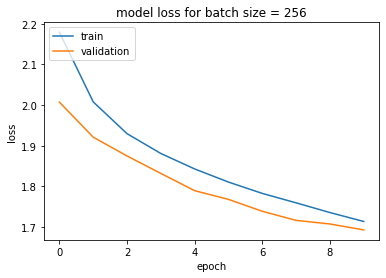

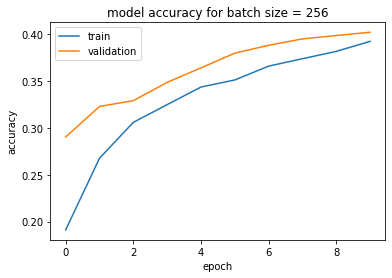

In [ ]:
#@title Batch Size: 256

model = Sequential()
model.add(Flatten())
model.add(Dense(1024, input_shape=(3072, )))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
#model.summary()

history = model.fit(x_train, y_train,
                    batch_size=256,
                    epochs=10,
                    verbose=1,
                    validation_split=0.2)


loss, acc = model.evaluate(x_test, y_test,verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)


plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss for batch size = 256')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy for batch size = 256')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Testing Diffirent Activation Functions

Epoch 1/10
157/157 [==============================] - 2s 8ms/step - loss: 2.1954 - accuracy: 0.1891 - val_loss: 2.0327 - val_accuracy: 0.2780
Epoch 2/10
157/157 [==============================] - 1s 5ms/step - loss: 2.0282 - accuracy: 0.2627 - val_loss: 1.9362 - val_accuracy: 0.3155
Epoch 3/10
157/157 [==============================] - 1s 7ms/step - loss: 1.9515 - accuracy: 0.2975 - val_loss: 1.8862 - val_accuracy: 0.3270
Epoch 4/10
157/157 [==============================] - 1s 9ms/step - loss: 1.8957 - accuracy: 0.3205 - val_loss: 1.8446 - val_accuracy: 0.3451
Epoch 5/10
157/157 [==============================] - 2s 10ms/step - loss: 1.8594 - accuracy: 0.3355 - val_loss: 1.8049 - val_accuracy: 0.3610
Epoch 6/10
157/157 [==============================] - 1s 9ms/step - loss: 1.8226 - accuracy: 0.3499 - val_loss: 1.7854 - val_accuracy: 0.3684
Epoch 7/10
157/157 [==============================] - 1s 8ms/step - loss: 1.7974 - accuracy: 0.3610 - val_loss: 1.7736 - val_accuracy: 0.3770
Epoch

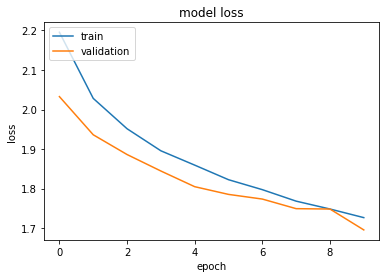

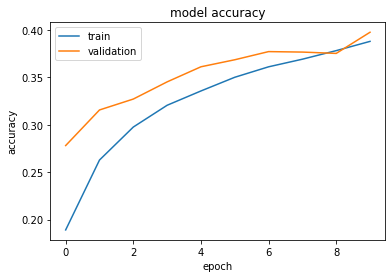

313/313 [==============================] - 1s 2ms/step
[[475  38  37  13  19  20  23  67 211  97]
 [ 40 430   5  13   8  50  33  52 102 267]
 [143  35 194  27 161 122 137 104  37  40]
 [ 44  65  50 134  39 291 110 134  39  94]
 [ 79  29 109  18 321  93 141 141  34  35]
 [ 33  29  71  75  53 398 105 145  48  43]
 [ 13  39  67  32 122 132 455  65  14  61]
 [ 55  45  32  23  78  80  41 516  24 106]
 [129  75   9  10   8  45   6  26 559 133]
 [ 45 145   5  14   6  25  25  56  96 583]]


In [ ]:
#@title Relu & Batch Size: 256


model = Sequential()
model.add(Flatten())
model.add(Dense(1024, input_shape=(3072, )))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
#model.summary()

history = model.fit(x_train, y_train,
                    batch_size=256,
                    epochs=10,
                    verbose=1,
                    validation_split=0.2)

loss, acc = model.evaluate(x_test, y_test,verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

y_pred = model.predict(x_test).argmax(axis=1)
confusion_matrix = confusion_matrix(y_test.argmax(axis=1),y_pred)

print(confusion_matrix)

Epoch 1/10
157/157 [==============================] - 2s 8ms/step - loss: 2.3692 - accuracy: 0.0990 - val_loss: 2.3044 - val_accuracy: 0.1015
Epoch 2/10
157/157 [==============================] - 1s 5ms/step - loss: 2.3620 - accuracy: 0.1007 - val_loss: 2.3033 - val_accuracy: 0.0977
Epoch 3/10
157/157 [==============================] - 1s 5ms/step - loss: 2.3559 - accuracy: 0.1033 - val_loss: 2.3023 - val_accuracy: 0.1022
Epoch 4/10
157/157 [==============================] - 1s 5ms/step - loss: 2.3521 - accuracy: 0.1028 - val_loss: 2.3014 - val_accuracy: 0.0952
Epoch 5/10
157/157 [==============================] - 1s 5ms/step - loss: 2.3494 - accuracy: 0.1040 - val_loss: 2.2980 - val_accuracy: 0.1277
Epoch 6/10
157/157 [==============================] - 1s 5ms/step - loss: 2.3441 - accuracy: 0.1029 - val_loss: 2.2981 - val_accuracy: 0.1321
Epoch 7/10
157/157 [==============================] - 1s 5ms/step - loss: 2.3423 - accuracy: 0.1042 - val_loss: 2.2965 - val_accuracy: 0.1023
Epoch 

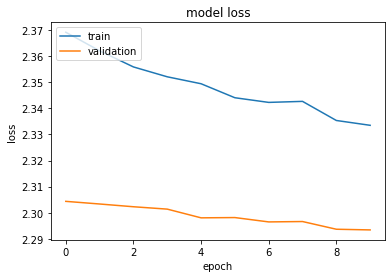

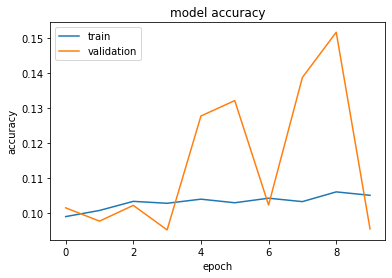

313/313 [==============================] - 1s 2ms/step
[[  3   0 956   0  40   0   1   0   0   0]
 [  0   0 885   0 112   0   3   0   0   0]
 [  0   0 932   0  65   0   3   0   0   0]
 [  0   0 915   0  84   0   1   0   0   0]
 [  0   0 943   0  53   0   4   0   0   0]
 [  0   0 920   0  78   0   2   0   0   0]
 [  0   0 879   0 115   0   6   0   0   0]
 [  0   0 923   0  76   0   1   0   0   0]
 [  1   0 938   0  61   0   0   0   0   0]
 [  0   0 940   0  59   0   1   0   0   0]]


In [ ]:
#@title Sigmoid & Batch Size: 256

from sklearn.metrics import confusion_matrix

model = Sequential()
model.add(Flatten())
model.add(Dense(1024, input_shape=(3072, )))
model.add(Activation('sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
#model.summary()

history = model.fit(x_train, y_train,
                    batch_size=256,
                    epochs=10,
                    verbose=1,
                    validation_split=0.2)

loss, acc = model.evaluate(x_test, y_test,verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

y_pred = model.predict(x_test).argmax(axis=1)
Confusion_matrix = confusion_matrix(y_test.argmax(axis=1),y_pred)

print(Confusion_matrix)

Epoch 1/10
157/157 [==============================] - 2s 8ms/step - loss: 2.1248 - accuracy: 0.2241 - val_loss: 1.9138 - val_accuracy: 0.3225
Epoch 2/10
157/157 [==============================] - 1s 6ms/step - loss: 1.9313 - accuracy: 0.3072 - val_loss: 1.9159 - val_accuracy: 0.3133
Epoch 3/10
157/157 [==============================] - 1s 7ms/step - loss: 1.8783 - accuracy: 0.3324 - val_loss: 1.8405 - val_accuracy: 0.3567
Epoch 4/10
157/157 [==============================] - 1s 7ms/step - loss: 1.8407 - accuracy: 0.3468 - val_loss: 1.8055 - val_accuracy: 0.3681
Epoch 5/10
157/157 [==============================] - 1s 5ms/step - loss: 1.8183 - accuracy: 0.3570 - val_loss: 1.7858 - val_accuracy: 0.3729
Epoch 6/10
157/157 [==============================] - 1s 5ms/step - loss: 1.8036 - accuracy: 0.3638 - val_loss: 1.7760 - val_accuracy: 0.3734
Epoch 7/10
157/157 [==============================] - 1s 5ms/step - loss: 1.7900 - accuracy: 0.3688 - val_loss: 1.8167 - val_accuracy: 0.3647
Epoch 

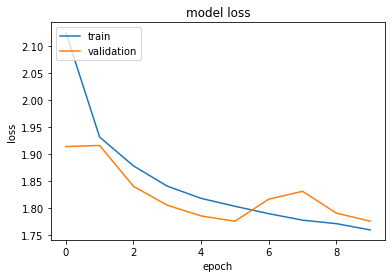

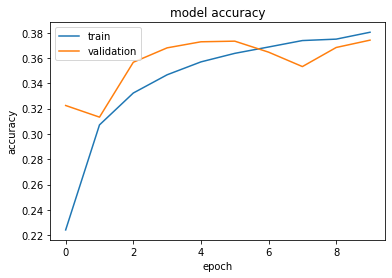

313/313 [==============================] - 1s 2ms/step
[[718  49  16  16   8   8  31  14 109  31]
 [162 515  10  25   8  32  46  21  77 104]
 [289  61 147  74  73  72 195  39  35  15]
 [171 103  39 233  29 163 148  37  35  42]
 [169  36  97  69 227  67 235  58  26  16]
 [167  53  57 148  40 292 136  43  46  18]
 [ 74  64  47  91  55  52 557  22  18  20]
 [190  65  43  63  70  56  77 346  30  60]
 [352  81   3  21   2  33  10   6 442  50]
 [197 218   4  24   8  16  45  23 117 348]]


In [ ]:
#@title tanh & Batch Size: 256 

from sklearn.metrics import confusion_matrix

model = Sequential()
model.add(Flatten())
model.add(Dense(1024, input_shape=(3072, )))
model.add(Activation('tanh'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('tanh'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('tanh'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
#model.summary()

history = model.fit(x_train, y_train,
                    batch_size=256,
                    epochs=10,
                    verbose=1,
                    validation_split=0.2)

loss, acc = model.evaluate(x_test, y_test,verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

y_pred = model.predict(x_test).argmax(axis=1)
Confusion_matrix = confusion_matrix(y_test.argmax(axis=1),y_pred)

print(Confusion_matrix)


## Testing Different Loss Functions

Epoch 1/10
157/157 [==============================] - 2s 8ms/step - loss: 2.1787 - accuracy: 0.1922 - val_loss: 2.0116 - val_accuracy: 0.2853
Epoch 2/10
157/157 [==============================] - 1s 6ms/step - loss: 2.0034 - accuracy: 0.2716 - val_loss: 1.9140 - val_accuracy: 0.3166
Epoch 3/10
157/157 [==============================] - 1s 6ms/step - loss: 1.9271 - accuracy: 0.3029 - val_loss: 1.8685 - val_accuracy: 0.3401
Epoch 4/10
157/157 [==============================] - 1s 6ms/step - loss: 1.8797 - accuracy: 0.3265 - val_loss: 1.8328 - val_accuracy: 0.3461
Epoch 5/10
157/157 [==============================] - 1s 5ms/step - loss: 1.8436 - accuracy: 0.3402 - val_loss: 1.7955 - val_accuracy: 0.3624
Epoch 6/10
157/157 [==============================] - 1s 5ms/step - loss: 1.8161 - accuracy: 0.3520 - val_loss: 1.7990 - val_accuracy: 0.3596
Epoch 7/10
157/157 [==============================] - 1s 5ms/step - loss: 1.7847 - accuracy: 0.3617 - val_loss: 1.7608 - val_accuracy: 0.3727
Epoch 

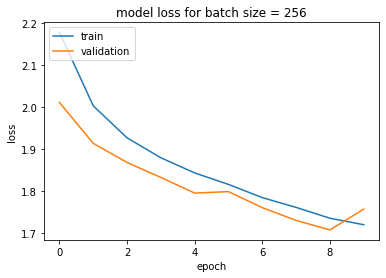

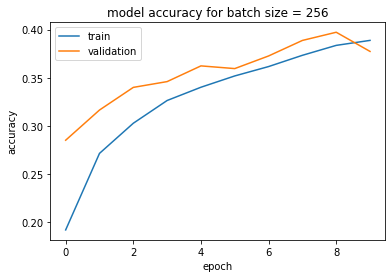

313/313 [==============================] - 1s 2ms/step
[[603  21 107   6  12   4  22  62 149  14]
 [160 342  25  23  24  30  42  70 151 133]
 [158  16 415  25 120  58  97  77  26   8]
 [ 87  31 192 134  73 188 114 118  35  28]
 [ 98  12 286  15 309  30 108 113  22   7]
 [ 58  13 181  81  98 297  89 131  40  12]
 [ 19  15 249  24 128  65 398  72  20  10]
 [ 78  32 106  30 103  43  32 526  25  25]
 [291  42  34   5   8  26   6  34 514  40]
 [166  96  23  17  17  20  45 117 164 335]]


In [ ]:
#@title Catagorical Cross Entropy & relu & Batch Size: 256
from sklearn.metrics import confusion_matrix

model = Sequential()
model.add(Flatten())
model.add(Dense(1024, input_shape=(3072, )))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
#model.summary()

history = model.fit(x_train, y_train,
                    batch_size=256,
                    epochs=10,
                    verbose=1,
                    validation_split=0.2)


loss, acc = model.evaluate(x_test, y_test,verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)


plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss for batch size = 256')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy for batch size = 256')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

y_pred = model.predict(x_test).argmax(axis=1)
Confusion_matrix = confusion_matrix(y_test.argmax(axis=1),y_pred)

print(Confusion_matrix)

Epoch 1/10
157/157 [==============================] - 2s 8ms/step - loss: 0.0923 - accuracy: 0.1033 - val_loss: 0.0901 - val_accuracy: 0.1258
Epoch 2/10
157/157 [==============================] - 1s 6ms/step - loss: 0.0910 - accuracy: 0.1111 - val_loss: 0.0897 - val_accuracy: 0.1450
Epoch 3/10
157/157 [==============================] - 1s 6ms/step - loss: 0.0906 - accuracy: 0.1188 - val_loss: 0.0894 - val_accuracy: 0.1505
Epoch 4/10
157/157 [==============================] - 1s 6ms/step - loss: 0.0902 - accuracy: 0.1257 - val_loss: 0.0891 - val_accuracy: 0.1594
Epoch 5/10
157/157 [==============================] - 1s 6ms/step - loss: 0.0900 - accuracy: 0.1321 - val_loss: 0.0889 - val_accuracy: 0.1641
Epoch 6/10
157/157 [==============================] - 1s 5ms/step - loss: 0.0897 - accuracy: 0.1385 - val_loss: 0.0887 - val_accuracy: 0.1722
Epoch 7/10
157/157 [==============================] - 1s 5ms/step - loss: 0.0895 - accuracy: 0.1424 - val_loss: 0.0884 - val_accuracy: 0.1848
Epoch 

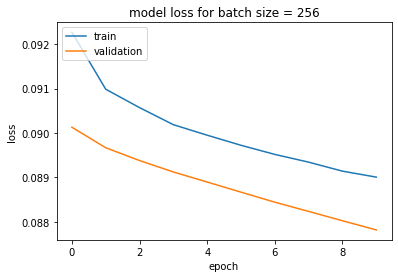

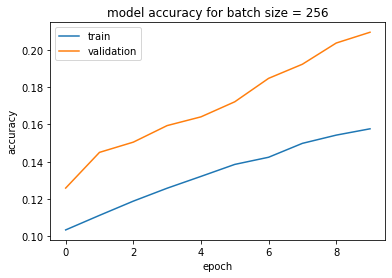

313/313 [==============================] - 1s 2ms/step
[[624   6  11  10  20  15   1   2 277  34]
 [288  15  31  32  55  72  16  15 371 105]
 [514   5  54  17 161  65  20   8 124  32]
 [350  11  81  55 117 162  13  11 133  67]
 [451   5  64  25 231  76  21   6  94  27]
 [367   3  76  47 127 200  18   4 119  39]
 [301   5  53  45 256 120  45  17 108  50]
 [340  10  79  49 137  80  14   4 186 101]
 [258   3   7  15   9  48   3   2 619  36]
 [258  14  25   9  41  15   5   6 424 203]]


In [ ]:
#@title MeanSquareError & relu & Batch Size: 256
from sklearn.metrics import confusion_matrix

model = Sequential()
model.add(Flatten())
model.add(Dense(1024, input_shape=(3072, )))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['accuracy'])
#model.summary()

history = model.fit(x_train, y_train,
                    batch_size=256,
                    epochs=10,
                    verbose=1,
                    validation_split=0.2)


loss, acc = model.evaluate(x_test, y_test,verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)


plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss for batch size = 256')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy for batch size = 256')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

y_pred = model.predict(x_test).argmax(axis=1)
Confusion_matrix = confusion_matrix(y_test.argmax(axis=1),y_pred)

print(Confusion_matrix)

Epoch 1/10
157/157 [==============================] - 2s 8ms/step - loss: 1.0428 - accuracy: 0.1130 - val_loss: 1.0111 - val_accuracy: 0.1742
Epoch 2/10
157/157 [==============================] - 1s 6ms/step - loss: 1.0228 - accuracy: 0.1373 - val_loss: 1.0076 - val_accuracy: 0.2040
Epoch 3/10
157/157 [==============================] - 1s 6ms/step - loss: 1.0165 - accuracy: 0.1467 - val_loss: 1.0059 - val_accuracy: 0.2163
Epoch 4/10
157/157 [==============================] - 1s 6ms/step - loss: 1.0136 - accuracy: 0.1537 - val_loss: 1.0049 - val_accuracy: 0.2216
Epoch 5/10
157/157 [==============================] - 1s 6ms/step - loss: 1.0116 - accuracy: 0.1604 - val_loss: 1.0042 - val_accuracy: 0.2325
Epoch 6/10
157/157 [==============================] - 1s 6ms/step - loss: 1.0103 - accuracy: 0.1637 - val_loss: 1.0037 - val_accuracy: 0.2371
Epoch 7/10
157/157 [==============================] - 1s 6ms/step - loss: 1.0093 - accuracy: 0.1688 - val_loss: 1.0034 - val_accuracy: 0.2410
Epoch 

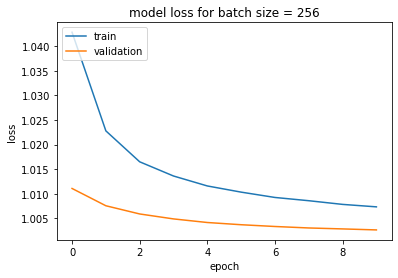

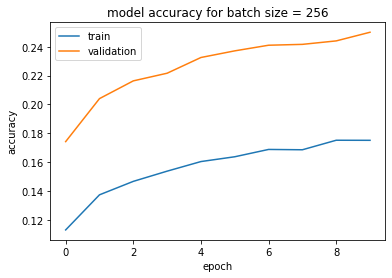

313/313 [==============================] - 1s 2ms/step
[[369  28  90  25  19  18  31  42 224 154]
 [ 69 147  67  58  41  36  73  65 157 287]
 [142  38 243  61  79  53  90 118  80  96]
 [ 75  65 151 144  53 109 101 119  64 119]
 [ 61  31 223  91 135  45 103 146  63 102]
 [ 46  31 147 126  62 154 116 126  77 115]
 [ 28  48 165 124  78  62 209 112  49 125]
 [ 53  54 148  74  51  70  73 213  66 198]
 [127  36  35  26  19  25  39  33 453 207]
 [ 52  98  49  31  21  24  53  56 154 462]]


In [ ]:
#@title CatagoricalHinge & relu & Batch Size: 256

from sklearn.metrics import confusion_matrix

model = Sequential()
model.add(Flatten())
model.add(Dense(1024, input_shape=(3072, )))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_hinge',
              optimizer='sgd',
              metrics=['accuracy'])
#model.summary()

history = model.fit(x_train, y_train,
                    batch_size=256,
                    epochs=10,
                    verbose=1,
                    validation_split=0.2)


loss, acc = model.evaluate(x_test, y_test,verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)


plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss for batch size = 256')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy for batch size = 256')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

y_pred = model.predict(x_test).argmax(axis=1)
Confusion_matrix = confusion_matrix(y_test.argmax(axis=1),y_pred)

print(Confusion_matrix)

## Testing Different Optimizers

Epoch 1/10
157/157 [==============================] - 2s 10ms/step - loss: 2.1828 - accuracy: 0.1915 - val_loss: 2.0134 - val_accuracy: 0.2955
Epoch 2/10
157/157 [==============================] - 1s 6ms/step - loss: 2.0078 - accuracy: 0.2743 - val_loss: 1.9057 - val_accuracy: 0.3313
Epoch 3/10
157/157 [==============================] - 1s 5ms/step - loss: 1.9246 - accuracy: 0.3107 - val_loss: 1.8579 - val_accuracy: 0.3429
Epoch 4/10
157/157 [==============================] - 1s 5ms/step - loss: 1.8767 - accuracy: 0.3282 - val_loss: 1.8196 - val_accuracy: 0.3553
Epoch 5/10
157/157 [==============================] - 1s 5ms/step - loss: 1.8357 - accuracy: 0.3449 - val_loss: 1.7863 - val_accuracy: 0.3778
Epoch 6/10
157/157 [==============================] - 1s 5ms/step - loss: 1.8023 - accuracy: 0.3589 - val_loss: 1.7723 - val_accuracy: 0.3723
Epoch 7/10
157/157 [==============================] - 1s 5ms/step - loss: 1.7784 - accuracy: 0.3708 - val_loss: 1.7398 - val_accuracy: 0.3852
Epoch

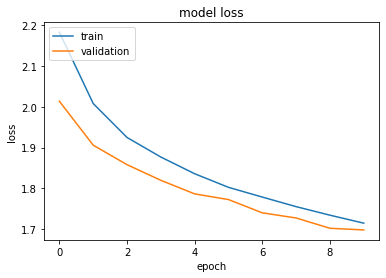

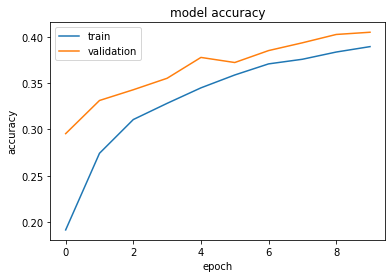

313/313 [==============================] - 1s 2ms/step
[[358  66  64  66  19  15  48  98 187  79]
 [ 18 546   5  63   6  29  55  52  49 177]
 [ 83  42 167 128 124  71 237 104  27  17]
 [  9  67  41 311  25 193 183  99  23  49]
 [ 30  32  82  69 274  53 268 144  26  22]
 [ 10  31  59 197  38 330 170 114  28  23]
 [  5  35  44  96  64  60 639  29   8  20]
 [  9  54  25  88  70  68 105 498  18  65]
 [ 76 122  28  40   5  40  21  55 486 127]
 [ 16 229   5  53   5  19  48  73  55 497]]


In [ ]:
#@title Stochastic Gradient Descent & Catagorical Cross Entropy & relu & Batch Size: 256

from sklearn.metrics import confusion_matrix

model = Sequential()
model.add(Flatten())
model.add(Dense(1024, input_shape=(3072, )))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
#model.summary()

history = model.fit(x_train, y_train,
                    batch_size=256,
                    epochs=10,
                    verbose=1,
                    validation_split=0.2)

loss, acc = model.evaluate(x_test, y_test,verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

y_pred = model.predict(x_test).argmax(axis=1)
confusion_matrix = confusion_matrix(y_test.argmax(axis=1),y_pred)

print(confusion_matrix)


Epoch 1/10
157/157 [==============================] - 2s 8ms/step - loss: 2.0444 - accuracy: 0.2503 - val_loss: 1.8123 - val_accuracy: 0.3471
Epoch 2/10
157/157 [==============================] - 1s 6ms/step - loss: 1.8204 - accuracy: 0.3411 - val_loss: 1.7734 - val_accuracy: 0.3603
Epoch 3/10
157/157 [==============================] - 1s 6ms/step - loss: 1.7617 - accuracy: 0.3651 - val_loss: 1.7174 - val_accuracy: 0.3849
Epoch 4/10
157/157 [==============================] - 1s 6ms/step - loss: 1.7116 - accuracy: 0.3860 - val_loss: 1.6523 - val_accuracy: 0.4077
Epoch 5/10
157/157 [==============================] - 1s 7ms/step - loss: 1.6693 - accuracy: 0.3995 - val_loss: 1.6226 - val_accuracy: 0.4204
Epoch 6/10
157/157 [==============================] - 1s 6ms/step - loss: 1.6391 - accuracy: 0.4108 - val_loss: 1.6620 - val_accuracy: 0.4147
Epoch 7/10
157/157 [==============================] - 1s 8ms/step - loss: 1.6124 - accuracy: 0.4186 - val_loss: 1.5707 - val_accuracy: 0.4396
Epoch 

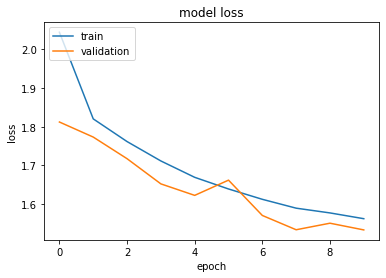

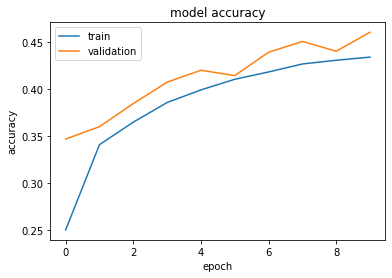

313/313 [==============================] - 1s 2ms/step
[[590  40 111  27  32   6  25  40  98  31]
 [ 65 574  10  26  18  15  19  34  71 168]
 [ 84  25 379  81 152  38 127  87  15  12]
 [ 33  20 128 301  74 131 163  86  25  39]
 [ 72   9 169  46 407  21 140 115  12   9]
 [ 36  14 139 211  73 277 100 106  23  21]
 [  5  17 101  76 121  31 591  36   9  13]
 [ 65  24  66  51  97  45  55 544  13  40]
 [214  63  46  27  27  11  12  16 521  63]
 [ 86 182  21  30  17  13  47  49  57 498]]


In [ ]:
#@title Adam & Catagorical Cross Entropy & relu & Batch Size: 256

from sklearn.metrics import confusion_matrix

model = Sequential()
model.add(Flatten())
model.add(Dense(1024, input_shape=(3072, )))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
#model.summary()

history = model.fit(x_train, y_train,
                    batch_size=256,
                    epochs=10,
                    verbose=1,
                    validation_split=0.2)

loss, acc = model.evaluate(x_test, y_test,verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

y_pred = model.predict(x_test).argmax(axis=1)
confusion_matrix = confusion_matrix(y_test.argmax(axis=1),y_pred)

print(confusion_matrix)

Epoch 1/10
157/157 [==============================] - 3s 10ms/step - loss: 2.1180 - accuracy: 0.2280 - val_loss: 1.9014 - val_accuracy: 0.3167
Epoch 2/10
157/157 [==============================] - 1s 8ms/step - loss: 1.8737 - accuracy: 0.3210 - val_loss: 1.8238 - val_accuracy: 0.3311
Epoch 3/10
157/157 [==============================] - 1s 8ms/step - loss: 1.8065 - accuracy: 0.3494 - val_loss: 1.7130 - val_accuracy: 0.3892
Epoch 4/10
157/157 [==============================] - 1s 8ms/step - loss: 1.7409 - accuracy: 0.3771 - val_loss: 1.7086 - val_accuracy: 0.3890
Epoch 5/10
157/157 [==============================] - 1s 8ms/step - loss: 1.6987 - accuracy: 0.3922 - val_loss: 1.6442 - val_accuracy: 0.4168
Epoch 6/10
157/157 [==============================] - 1s 8ms/step - loss: 1.6480 - accuracy: 0.4099 - val_loss: 1.6474 - val_accuracy: 0.4118
Epoch 7/10
157/157 [==============================] - 1s 8ms/step - loss: 1.6158 - accuracy: 0.4171 - val_loss: 1.6179 - val_accuracy: 0.4154
Epoch

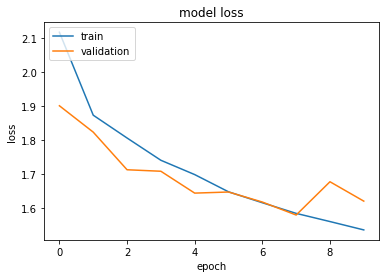

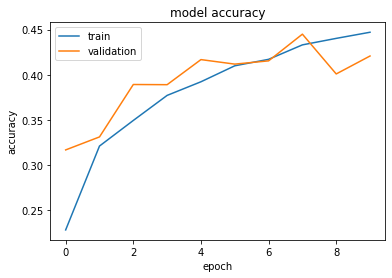

313/313 [==============================] - 1s 2ms/step
[[470   4  82  34  59  17  11 111 156  56]
 [109 280  20  45  26  21   8  87  61 343]
 [ 61   4 348 107 177  72  54 123  42  12]
 [ 23   4 104 277  87 195  60 166  39  45]
 [ 39   0 208  70 420  45  53 136  22   7]
 [ 12   0 117 168  97 369  43 134  42  18]
 [  3   6 125 145 183  54 347  96  14  27]
 [ 29   3  59  50 128  59  14 626  12  20]
 [143  21  14  31  34  26   4  78 509 140]
 [ 66  51  11  33  31  21  12 169  39 567]]


In [ ]:
#@title Nadam & Catagorical Cross Entropy & relu & Batch Size: 256

from sklearn.metrics import confusion_matrix

model = Sequential()
model.add(Flatten())
model.add(Dense(1024, input_shape=(3072, )))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='nadam',
              metrics=['accuracy'])
#model.summary()

history = model.fit(x_train, y_train,
                    batch_size=256,
                    epochs=10,
                    verbose=1,
                    validation_split=0.2)

loss, acc = model.evaluate(x_test, y_test,verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

y_pred = model.predict(x_test).argmax(axis=1)
confusion_matrix = confusion_matrix(y_test.argmax(axis=1),y_pred)

print(confusion_matrix)

## Best MLP

Epoch 1/10
157/157 [==============================] - 2s 8ms/step - loss: 2.0146 - accuracy: 0.2655 - val_loss: 1.8606 - val_accuracy: 0.3250
Epoch 2/10
157/157 [==============================] - 1s 6ms/step - loss: 1.8197 - accuracy: 0.3409 - val_loss: 1.7622 - val_accuracy: 0.3750
Epoch 3/10
157/157 [==============================] - 1s 6ms/step - loss: 1.7605 - accuracy: 0.3654 - val_loss: 1.7094 - val_accuracy: 0.3867
Epoch 4/10
157/157 [==============================] - 1s 5ms/step - loss: 1.7084 - accuracy: 0.3846 - val_loss: 1.6584 - val_accuracy: 0.4122
Epoch 5/10
157/157 [==============================] - 1s 6ms/step - loss: 1.6830 - accuracy: 0.3961 - val_loss: 1.6217 - val_accuracy: 0.4240
Epoch 6/10
157/157 [==============================] - 1s 5ms/step - loss: 1.6523 - accuracy: 0.4077 - val_loss: 1.6183 - val_accuracy: 0.4253
Epoch 7/10
157/157 [==============================] - 1s 5ms/step - loss: 1.6205 - accuracy: 0.4176 - val_loss: 1.5769 - val_accuracy: 0.4395
Epoch 

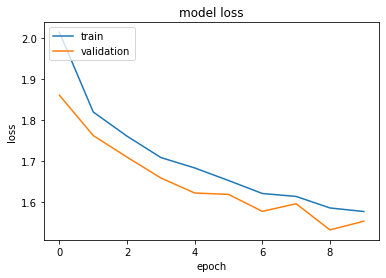

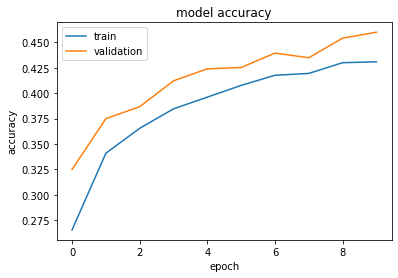

313/313 [==============================] - 1s 2ms/step
[[442  27  77  30  43  23  45  78 181  54]
 [ 32 529  12  32  16  41  43  49  69 177]
 [ 65  19 246  71 179  96 186  99  26  13]
 [ 20  14  68 239  54 225 242  73  26  39]
 [ 44   4  91  53 400  61 208 107  20  12]
 [ 10   9  69 163  61 397 171  81  25  14]
 [  3   6  51  51 108  47 680  28   8  18]
 [ 19  11  33  48  91  99  76 573  14  36]
 [ 74  55  18  27  29  32  23  31 632  79]
 [ 29 145  10  29  10  31  55  82  64 545]]
Precision: 0.472795
Recall: 0.468300
F1 score: 0.462668


In [ ]:
#@title Adam & Catagorical Cross Entropy & relu & Batch Size: 256

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

model = Sequential()
model.add(Flatten())
model.add(Dense(1024, input_shape=(3072, )))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
#model.summary()

history = model.fit(x_train, y_train,
                    batch_size=256,
                    epochs=10,
                    verbose=1,
                    validation_split=0.2)

loss, acc = model.evaluate(x_test, y_test,verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

y_pred = np.argmax(model.predict(x_test),axis=1)
confusion_matrix = confusion_matrix(y_test.argmax(axis=1),y_pred)

print(confusion_matrix)


precision = precision_score(y_test.argmax(axis=1), y_pred, average = 'weighted')
print('Precision: %f' % precision)

recall = recall_score(y_test.argmax(axis=1), y_pred,average = 'weighted')
print('Recall: %f' % recall)

f1 = f1_score(y_test.argmax(axis=1), y_pred,average = 'weighted')
print('F1 score: %f' % f1)

# MLP + CNN

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import BatchNormalization
import tensorflow as tf
from sklearn.metrics import confusion_matrix


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu' , kernel_initializer='he_uniform', padding='same', input_shape = (32,32,3)))
model.add(Conv2D(32, (3, 3) , activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Flatten())
model.add(Dense(64, input_dim = 32*32*3))
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))
opt = tf.keras.optimizers.SGD(lr = 0.01, momentum = 0.9)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    batch_size=256,
                    epochs=10,
                    verbose=1,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 4s 17ms/step - loss: 1.7794 - accuracy: 0.3535 - val_loss: 1.5053 - val_accuracy: 0.4576
Epoch 2/10
157/157 [==============================] - 2s 15ms/step - loss: 1.4131 - accuracy: 0.4881 - val_loss: 1.3570 - val_accuracy: 0.5119
Epoch 3/10
157/157 [==============================] - 2s 15ms/step - loss: 1.2321 - accuracy: 0.5586 - val_loss: 1.2803 - val_accuracy: 0.5383
Epoch 4/10
157/157 [==============================] - 2s 15ms/step - loss: 1.0953 - accuracy: 0.6088 - val_loss: 1.2294 - val_accuracy: 0.5624
Epoch 5/10
157/157 [==============================] - 2s 15ms/step - loss: 0.9760 - accuracy: 0.6564 - val_loss: 1.0766 - val_accuracy: 0.6209
Epoch 6/10
157/157 [==============================] - 2s 15ms/step - loss: 0.8561 - accuracy: 0.6993 - val_loss: 1.0837 - val_accuracy: 0.6258
Epoch 7/10
157/157 [==============================] - 2s 16ms/step - loss: 0.7545 - accuracy: 0.7353 - val_loss: 1.0535 - val_accuracy: 0.6411

313/313 [==============================] - 1s 3ms/step - loss: 1.2764 - accuracy: 0.6227
Test loss: 1.2763519287109375
Test acc: 0.6226999759674072


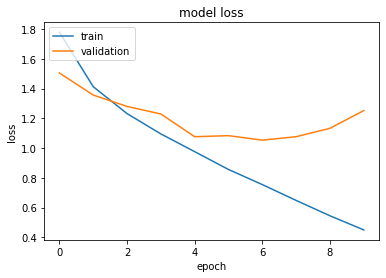

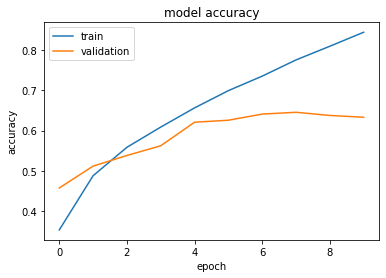

313/313 [==============================] - 1s 2ms/step
[[681  31  85  19  11  13  25   8  82  45]
 [ 31 766  18   5   1  11  27   4  26 111]
 [ 63   9 538  29  55 114 135  28  18  11]
 [ 17  17 103 259  46 323 177  30  16  12]
 [ 27   7 162  34 453  68 200  31  15   3]
 [ 10   7  97  73  47 646  77  27  11   5]
 [  9   5  43  23  15  47 847   2   3   6]
 [ 22  10  79  23  70 148  21 608   3  16]
 [ 72  59  20   5   2  19  25   3 752  43]
 [ 40 129  27  14   7  21  39  14  32 677]]


In [ ]:
loss, acc = model.evaluate(np.array(x_test), y_test)
print('Test loss:', loss)
print('Test acc:', acc)

plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

y_pred = model.predict(x_test).argmax(axis=1)
Confusion_matrix = confusion_matrix(y_test.argmax(axis=1),y_pred)

print(Confusion_matrix)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
157/157 [==============================] - 3s 13ms/step - loss: 1.5140 - accuracy: 0.4535 - val_loss: 1.6337 - val_accuracy: 0.4795
Epoch 2/10
157/157 [==============================] - 2s 11ms/step - loss: 1.1189 - accuracy: 0.6001 - val_loss: 1.4496 - val_accuracy: 0.4993
Epoch 3/10
157/157 [==============================] - 2s 11ms/step - loss: 0.9521 - accuracy: 0.6629 - val_loss: 1.2678 - val_accuracy: 0.5653
Epoch 4/10
157/157 [==============================] - 2s 12ms/step - loss: 0.8492 - accuracy: 0.6998 - val_loss: 0.9976 - val_accuracy: 0.6490
Epoch 5/10
157/157 [==============================] - 2s 11ms/step - loss: 0.7543 - accuracy: 0.7341 - val_loss: 1.2158 - val_accuracy: 0.5914
Epoch 6/10
157/157 [==============================] - 2s 11ms/step - loss: 0.6736 - accuracy: 0.7618 - val_loss: 1.0889 - val_accuracy: 0.6348
Epoch 7/10
157/157 [==============================] - 2s 12ms/step - loss: 0.5938 - accuracy: 0.7901 - val_loss: 1.1287 - val_accuracy: 0.6356

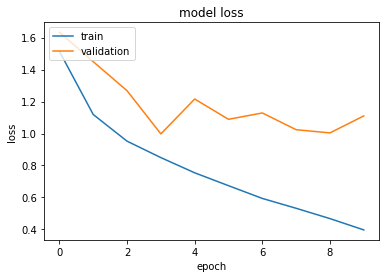

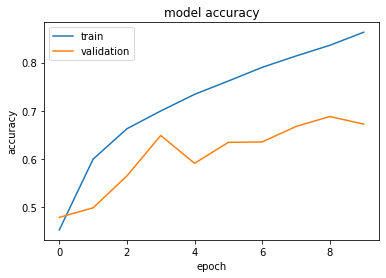

313/313 [==============================] - 1s 2ms/step
[[639  18  63  34  69   7   7  38  71  54]
 [ 16 772   7   9   1  10   9   9  13 154]
 [ 49   9 430  85 155  79  53 105  17  18]
 [ 13   9  47 550  89 150  35  78   9  20]
 [  6   6  26  70 655  38  30 157   6   6]
 [  9   5  28 227  66 526  15 115   4   5]
 [  9   6  22  97  72  39 725  18   1  11]
 [  8   3  17  46  38  32   5 836   4  11]
 [ 59  56  19  31  20   6   8  11 727  63]
 [ 35  54   5  14  11   7   3  36  14 821]]


In [ ]:
#@title MLP+CNN+Pooling+BatchNormalization

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu' , kernel_initializer='he_uniform', padding='same', input_shape = (32,32,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3, 3) , activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(64, input_dim = 32*32*3))
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))
opt = tf.keras.optimizers.SGD(lr = 0.01, momentum = 0.9)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    batch_size=256,
                    epochs=10,
                    verbose=1,
                    validation_split=0.2)

loss, acc = model.evaluate(np.array(x_test), y_test)
print('Test loss:', loss)
print('Test acc:', acc)

plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

y_pred = model.predict(x_test).argmax(axis=1)
Confusion_matrix = confusion_matrix(y_test.argmax(axis=1),y_pred)

print(Confusion_matrix)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
157/157 [==============================] - 3s 14ms/step - loss: 1.5423 - accuracy: 0.4387 - val_loss: 1.8305 - val_accuracy: 0.3671
Epoch 2/10
157/157 [==============================] - 2s 12ms/step - loss: 1.1645 - accuracy: 0.5804 - val_loss: 1.4115 - val_accuracy: 0.4996
Epoch 3/10
157/157 [==============================] - 2s 11ms/step - loss: 1.0123 - accuracy: 0.6376 - val_loss: 1.0737 - val_accuracy: 0.6211
Epoch 4/10
157/157 [==============================] - 2s 12ms/step - loss: 0.9221 - accuracy: 0.6716 - val_loss: 0.9787 - val_accuracy: 0.6523
Epoch 5/10
157/157 [==============================] - 2s 12ms/step - loss: 0.8409 - accuracy: 0.7000 - val_loss: 1.4752 - val_accuracy: 0.5248
Epoch 6/10
157/157 [==============================] - 2s 11ms/step - loss: 0.7766 - accuracy: 0.7244 - val_loss: 0.9554 - val_accuracy: 0.6751
Epoch 7/10
157/157 [==============================] - 2s 12ms/step - loss: 0.7171 - accuracy: 0.7445 - val_loss: 1.3328 - val_accuracy: 0.5583

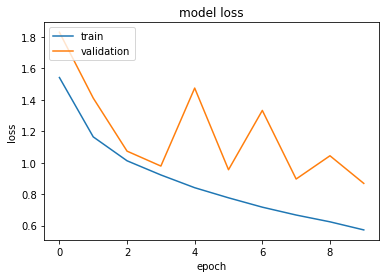

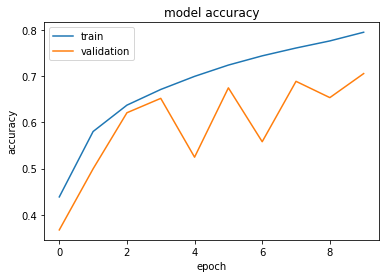

313/313 [==============================] - 1s 2ms/step
[[849  26  32  13  11   9   8   7  31  14]
 [ 39 870   4   4   3   4   9   3  19  45]
 [ 95   8 564  59  64  95  73  28   6   8]
 [ 45  23  48 431  50 254  89  45   5  10]
 [ 45   6  64  72 568  61  83  93   5   3]
 [ 20   6  38 122  33 691  30  52   3   5]
 [  5   8  35  57  21  33 827   8   1   5]
 [ 29   5  29  31  51  61   8 778   1   7]
 [165  50  10   7   6   5   4   7 728  18]
 [ 68 169  10  10   2   5   8  16  17 695]]


In [ ]:
#@title MLP+CNN+Pooling+BatchNormalization+Dropout

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu' , kernel_initializer='he_uniform', padding='same', input_shape = (32,32,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3) , activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, input_dim = 32*32*3))
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))
opt = tf.keras.optimizers.SGD(lr = 0.01, momentum = 0.9)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    batch_size=256,
                    epochs=10,
                    verbose=1,
                    validation_split=0.2)

loss, acc = model.evaluate(np.array(x_test), y_test)
print('Test loss:', loss)
print('Test acc:', acc)

plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

y_pred = model.predict(x_test).argmax(axis=1)
Confusion_matrix = confusion_matrix(y_test.argmax(axis=1),y_pred)

print(Confusion_matrix)
